<a href="https://colab.research.google.com/github/bebyakinb/test_assignments_Analyst/blob/master/postal/postal_service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ССЫЛКА НА ЗАДАНИЕ](https://docs.google.com/document/d/1M3F25z1WCE704SjEMwKa_w2jQdicc2We6N3uj7Zj62w/edit?usp=sharing)

## 0.Подготовка данных

In [4]:
!wget https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release -O sqlite.tar.gz &> /dev/null
!tar xzf sqlite.tar.gz &> /dev/null
%cd sqlite/
!./configure &> /dev/null
!make sqlite3.c &> /dev/null
%cd /content
!npx degit coleifer/pysqlite3 -f &> /dev/null
!cp sqlite/sqlite3.[ch] .
!python setup.py build_static build &> /dev/null
!cp build/lib.linux-x86_64-3.6/pysqlite3/_sqlite3.cpython-36m-x86_64-linux-gnu.so \
    /usr/lib/python3.6/lib-dynload/_sqlite3.cpython-36m-x86_64-linux-gnu.so

/content/sqlite
/content
cp: cannot stat 'build/lib.linux-x86_64-3.6/pysqlite3/_sqlite3.cpython-36m-x86_64-linux-gnu.so': No such file or directory


In [5]:
import sqlite3
sqlite3.sqlite_version

'3.22.0'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Засемплируем данные для витрины parcel_aggr

In [7]:
parcel_aggr = pd.DataFrame({'parcel_id':range(1000)})
parcel_aggr['accept_date'] = (pd.Series(
    pd.date_range(start='2017-04-01',
                  end='2017-04-30')).sample(1000,replace=True).values)

In [8]:
parcel_aggr

,parcel_id,accept_date
0,0,2017-04-16
1,1,2017-04-13
2,2,2017-04-09
3,3,2017-04-06
4,4,2017-04-22
...,...,...
995,995,2017-04-26
996,996,2017-04-21
997,997,2017-04-17
998,998,2017-04-01


In [9]:
parcel_aggr['index_id'] = pd.Series(range(30)).sample(1000,replace=True).values
parcel_aggr['mass'] = np.round(np.abs(
    np.random.normal(1000,4000,size=1000))).astype(int)
parcel_aggr['price'] = np.round(np.abs(
    np.random.normal(10000,40000,size=1000))).astype(int)
parcel_aggr['client_type'] = (pd.Series(
    ['Физическое лицо','Юридическое лицо']).sample(1000,replace=True,).values)

In [10]:
parcel_aggr

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-16,5,425,23578,Физическое лицо
1,1,2017-04-13,25,3011,84122,Юридическое лицо
2,2,2017-04-09,22,886,7699,Физическое лицо
3,3,2017-04-06,8,1892,23200,Юридическое лицо
4,4,2017-04-22,3,554,40641,Юридическое лицо
...,...,...,...,...,...,...
995,995,2017-04-26,6,1624,39825,Физическое лицо
996,996,2017-04-21,1,2937,15825,Физическое лицо
997,997,2017-04-17,18,2239,51135,Физическое лицо
998,998,2017-04-01,15,5604,59198,Юридическое лицо


### Засемплируем данные для index_data

In [11]:
index_data = pd.DataFrame({'index_id':range(30)})
index_data['area'] = [''.join(chr(
    np.random.choice(range(65,90))) for i in range(4)) for _ in range(30)]
index_data['population'] = np.round(np.abs(
    np.random.normal(10000,40000,size=30))).astype(int)
index_data['area'].value_counts()

EEVA    1
VJHR    1
HERJ    1
YYNU    1
VYGW    1
YFTH    1
VQCJ    1
ACEQ    1
OWWG    1
XBJP    1
VNDE    1
XRRY    1
GXQF    1
UJJS    1
BOYN    1
GLUR    1
RLJI    1
BBPB    1
PGXW    1
SYXY    1
XFSK    1
QAJU    1
OOYY    1
VBBE    1
MXQI    1
FCTY    1
YAYT    1
VFGY    1
DJVQ    1
PVMW    1
Name: area, dtype: int64

### Перенос данных на sqlite3

In [12]:
con = sqlite3.connect('db')
cur = con.cursor()

In [13]:
parcel_aggr.to_sql('parcel_aggr',con,if_exists='replace',index=False)

In [14]:
def select(sql):
  return pd.read_sql(sql,con)

In [15]:
sql = '''select * from parcel_aggr'''
select(sql)

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-16 00:00:00,5,425,23578,Физическое лицо
1,1,2017-04-13 00:00:00,25,3011,84122,Юридическое лицо
2,2,2017-04-09 00:00:00,22,886,7699,Физическое лицо
3,3,2017-04-06 00:00:00,8,1892,23200,Юридическое лицо
4,4,2017-04-22 00:00:00,3,554,40641,Юридическое лицо
...,...,...,...,...,...,...
995,995,2017-04-26 00:00:00,6,1624,39825,Физическое лицо
996,996,2017-04-21 00:00:00,1,2937,15825,Физическое лицо
997,997,2017-04-17 00:00:00,18,2239,51135,Физическое лицо
998,998,2017-04-01 00:00:00,15,5604,59198,Юридическое лицо


In [16]:
index_data.to_sql('index_data',con,if_exists='replace',index=False)

In [17]:
sql = '''select * from index_data'''
select(sql)

,index_id,area,population
0,0,EEVA,25015
1,1,VJHR,92109
2,2,DJVQ,28936
3,3,VFGY,27770
4,4,YAYT,10936
5,5,FCTY,56807
6,6,MXQI,24852
7,7,VBBE,17194
8,8,OOYY,38357
9,9,QAJU,5315


## 1. Вывести средний размер тарифа на пересылку и массы по индексам отделений, в которых было принято отправление.


###SQL

In [18]:
sql = '''
select index_id, avg(price), avg(mass)
from parcel_aggr
group by index_id
'''
select(sql)

,index_id,avg(price),avg(mass)
0,0,39647.612903,2679.451613
1,1,29805.192308,3694.692308
2,2,32695.066667,2712.666667
3,3,35307.000000,3250.240000
4,4,29493.700000,3551.266667
5,5,27008.878788,3027.060606
6,6,28501.411765,3088.617647
7,7,30276.000000,3129.250000
8,8,28702.000000,3557.100000
9,9,29928.400000,3200.700000


### PANDAS

In [19]:
parcel_aggr.groupby('index_id')['price','mass'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,price,mass
index_id,,
0,39647.612903,2679.451613
1,29805.192308,3694.692308
2,32695.066667,2712.666667
3,35307.000000,3250.240000
4,29493.700000,3551.266667
5,27008.878788,3027.060606
6,28501.411765,3088.617647
7,30276.000000,3129.250000
8,28702.000000,3557.100000


##2.Вывести количество отправлений в разрезе индексов отделений, в которых было принято отправление. Учитывать только те отправления, у которых масса  больше  или равна 10 кг

### SQL

In [20]:
sql = '''
select index_id, count(index_id) from parcel_aggr
where mass >= 10000
group by index_id
'''
select(sql)

,index_id,count(index_id)
0,1,1
1,2,1
2,4,1
3,6,1
4,8,1
5,10,1
6,12,1
7,13,1
8,15,1
9,18,1


### PANDAS

In [21]:
parcel_aggr[parcel_aggr["mass"]>=10000].groupby(
    ['index_id'])['parcel_id'].count()

index_id
1     1
2     1
4     1
6     1
8     1
10    1
12    1
13    1
15    1
18    1
19    1
21    1
25    1
28    3
29    2
Name: parcel_id, dtype: int64

##3.Вывести  количество отправлений в разрезе  типа отправителя и группы по численности населения населенного пункта, в котором было принято отправление (меньше 50 тыс. (включительно), от 50 до 100 тыс. (включительно), от 100 до 500 тыс. (включительно), больше 500 тыс.).

###SQL

In [22]:
sql = '''
select client_type, population_group, count(parcel_id)
from (
  select client_type, parcel_id,
  case
    when population <= 50000 then '<= 50k'
    when population > 50000 and population <= 100000 then '> 50k and <= 100k'
    when population > 100000 and population <= 500000 then '> 100k and <= 500k'
    when population > 500000 then '> 500k'
    end as population_group
  from parcel_aggr
  left join index_data on index_data.index_id == parcel_aggr.index_id
) population_groups
group by client_type, population_group
'''
select(sql)

,client_type,population_group,count(parcel_id)
0,Физическое лицо,<= 50k,410
1,Физическое лицо,> 50k and <= 100k,99
2,Юридическое лицо,<= 50k,393
3,Юридическое лицо,> 50k and <= 100k,98


###PANDAS

In [23]:
bins = [0, 50000, 100000, 500000, float("inf")]
labels = ['<= 50k', '> 50k and <= 100k', '> 100k and <= 500k', '> 500k']
parcel_with_populaton = parcel_aggr.merge(index_data, on='index_id', how='left')
parcel_with_populaton['population_group'] = pd.cut(x = parcel_with_populaton['population'], bins = bins, labels = labels)
parcel_with_populaton.groupby(['client_type', 'population_group'])['parcel_id'].count()

client_type       population_group  
Физическое лицо   <= 50k                410
                  > 50k and <= 100k      99
                  > 100k and <= 500k      0
                  > 500k                  0
Юридическое лицо  <= 50k                393
                  > 50k and <= 100k      98
                  > 100k and <= 500k      0
                  > 500k                  0
Name: parcel_id, dtype: int64

##4.Вывести идентификатор отправления; регион, где было принято отправление; численность населения населенного пункта, в котором было принято отправление и стоимость пересылки отправления (в рублях) с максимальной массой в каждом филиале.


##SQL

In [24]:
sql = '''
select parcel_id, area, population, price/100
from parcel_aggr
left join index_data on index_data.index_id == parcel_aggr.index_id
where mass in (
  select max(mass)
  from parcel_aggr group by index_id
  )
order by parcel_id
'''
select(sql)

,parcel_id,area,population,price/100
0,23,PGXW,8151,150
1,40,GXQF,21944,360
2,55,QAJU,5315,506
3,59,HERJ,62822,16
4,67,XRRY,51368,107
5,76,VNDE,74467,379
6,91,PVMW,23346,309
7,195,VQCJ,38746,352
8,265,BBPB,27590,98
9,271,DJVQ,28936,218


##PANDAS

In [25]:
parcel_with_populaton = parcel_aggr.merge(index_data, on='index_id', how='left')
parcel_with_populaton['price_in_rubles'] = parcel_with_populaton['price']/100
parcel_with_populaton[
    parcel_with_populaton['mass'].isin(
    parcel_with_populaton.groupby(['index_id'])['mass'].max())][
  ['parcel_id','area','population','price_in_rubles']]

,parcel_id,area,population,price_in_rubles
23,23,PGXW,8151,150.30
40,40,GXQF,21944,360.01
55,55,QAJU,5315,506.95
59,59,HERJ,62822,16.89
67,67,XRRY,51368,107.62
76,76,VNDE,74467,379.86
91,91,PVMW,23346,309.90
195,195,VQCJ,38746,352.27
265,265,BBPB,27590,98.45
271,271,DJVQ,28936,218.63


##5.Вывести идентификаторы отправлений, у которых  масса строго больше, чем в среднем по базе.


###SQL

In [26]:
sql = '''
select parcel_id
from parcel_aggr
where mass > (select avg(mass) from parcel_aggr)
'''
select(sql)

,parcel_id
0,6
1,7
2,8
3,9
4,10
...,...
411,990
412,991
413,992
414,998


###PANDAS

In [27]:
parcel_aggr[parcel_aggr['mass'] > parcel_aggr['mass'].mean()]['parcel_id']

6        6
7        7
8        8
9        9
10      10
      ... 
990    990
991    991
992    992
998    998
999    999
Name: parcel_id, Length: 416, dtype: int64

##6.Перед отпуском руководитель попросил вас: «вывести распределение количества отправлений по стоимости пересылки*». Необходимо подготовить 1 слайд, который раскроет данную проблематику.


###SQL

In [28]:
sql= '''
select min(price), avg(price), max(price)
from parcel_aggr
'''
select(sql)

,min(price),avg(price),max(price)
0,7,32551.234,137077


In [29]:
sql = '''
select client_type, price_group, count(parcel_id)
from (
  select client_type, parcel_id,
  case
    when price <= 10000 then '00_(<= 100)'
    when price > 10000 and price <= 20000 then '01_(> 100 and <= 200)'
    when price > 20000 and price <= 30000 then '02_(> 200 and <= 300)'
    when price > 30000 and price <= 40000 then '03_(> 300 and <= 400)'
    when price > 40000 and price <= 50000 then '04_(> 400 and <= 500)'
    when price > 50000 and price <= 60000 then '05_(> 500 and <= 600)'
    when price > 60000 and price <= 70000 then '06_(> 600 and <= 700)'
    when price > 70000 and price <= 80000 then '07_(> 700 and <= 800)'
    when price > 80000 and price <= 90000 then '08_(> 800 and <= 900)'
    when price > 90000 and price <= 100000 then '09_(> 900 and <= 1000)'
    when price > 100000 and price <= 110000 then '10_(> 1000 and <= 1100)'
    when price > 110000 and price <= 120000 then '11_(> 1100 and <= 1200)'
    when price > 120000 then '12_(> 1200)'
    end as price_group
  from parcel_aggr
  left join index_data on index_data.index_id == parcel_aggr.index_id
) price_groups
group by client_type, price_group
'''
select(sql)

,client_type,price_group,count(parcel_id)
0,Физическое лицо,00_(<= 100),91
1,Физическое лицо,01_(> 100 and <= 200),97
2,Физическое лицо,02_(> 200 and <= 300),87
3,Физическое лицо,03_(> 300 and <= 400),74
4,Физическое лицо,04_(> 400 and <= 500),50
5,Физическое лицо,05_(> 500 and <= 600),41
6,Физическое лицо,06_(> 600 and <= 700),26
7,Физическое лицо,07_(> 700 and <= 800),24
8,Физическое лицо,08_(> 800 and <= 900),5
9,Физическое лицо,09_(> 900 and <= 1000),8


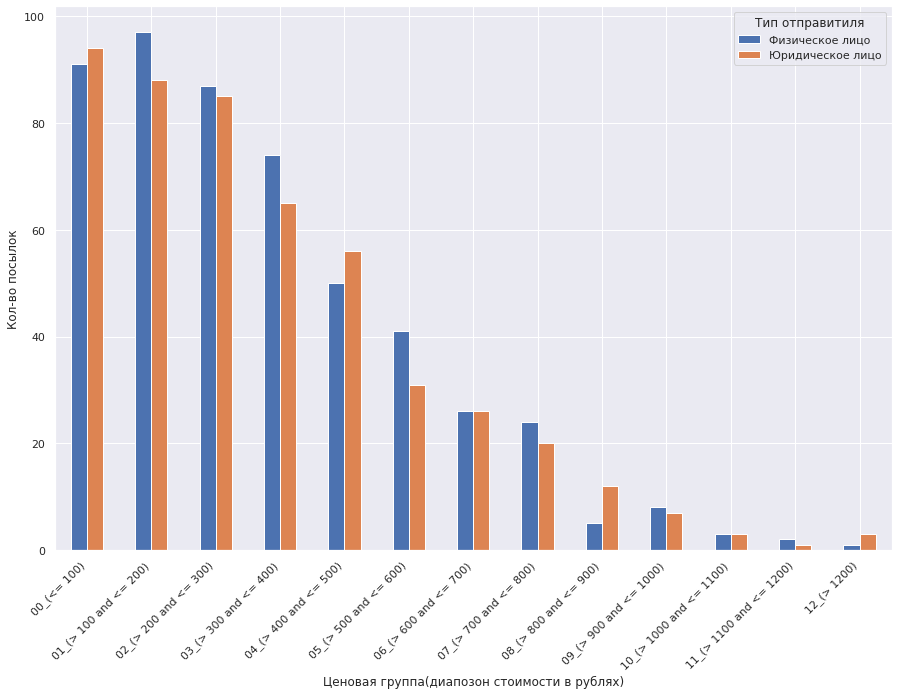

In [30]:
prices = select(sql)
pt = prices.pivot_table(index='price_group', columns=['client_type'], values='count(parcel_id)')

sns.set()
plt.rcParams["figure.figsize"] = (15,10)
pt.plot(kind='bar')
plt.legend(title='Тип отправитиля')
plt.ylabel('Кол-во посылок')
plt.xlabel('Ценовая группа(диапозон стоимости в рублях)')
plt.xticks(rotation=45, ha='right')
plt.show()

###PANDAS

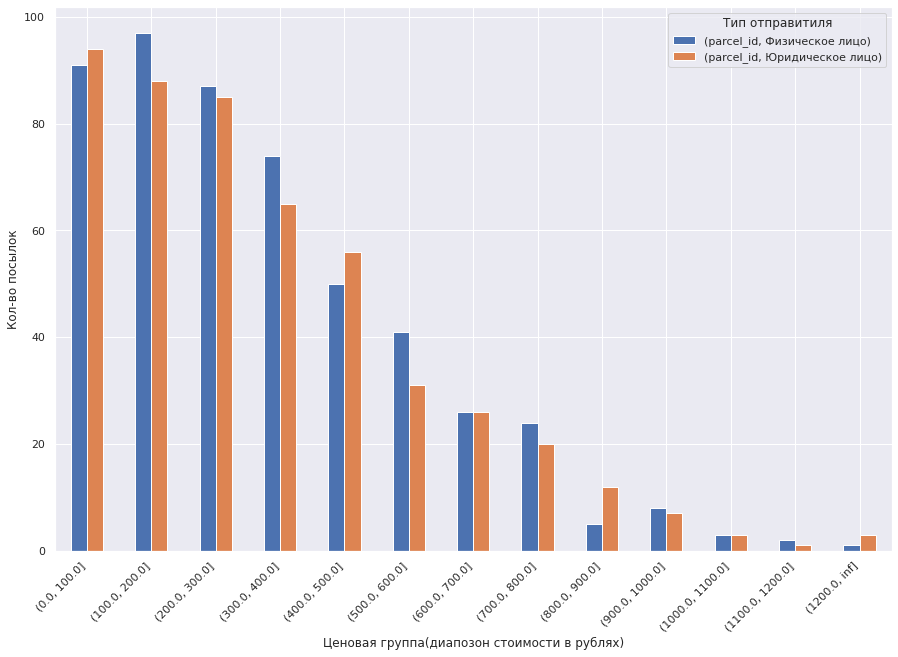

In [31]:
bins = list(range(0,1300,100))
bins.append(float("inf"))
parcel_aggr['price_group'] = pd.cut(x = parcel_aggr['price']/100, bins = bins)
pt = parcel_aggr.pivot_table(index='price_group', columns=['client_type'], values=['parcel_id'], aggfunc="count")

sns.set()
plt.rcParams["figure.figsize"] = (15,10)
pt.plot(kind='bar')
plt.legend(title='Тип отправитиля')
plt.ylabel('Кол-во посылок')
plt.xlabel('Ценовая группа(диапозон стоимости в рублях)')
plt.xticks(rotation=45, ha='right')
plt.show()